<a href="https://colab.research.google.com/github/ryanreilly/phase_5_capstone/blob/main/VGG16_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
!unzip drive/MyDrive/train.zip
!unzip drive/MyDrive/dev.zip
!unzip drive/MyDrive/test.zip

Streaming output truncated to the last 5000 lines.
  inflating: test/not_disaster/1035802906522345473_1.jpg  
  inflating: __MACOSX/test/not_disaster/._1035802906522345473_1.jpg  
  inflating: test/not_disaster/ad_2017-11-25_03-34-48.jpg  
  inflating: __MACOSX/test/not_disaster/._ad_2017-11-25_03-34-48.jpg  
  inflating: test/not_disaster/ad_2017-11-25_08-04-10.jpg  
  inflating: __MACOSX/test/not_disaster/._ad_2017-11-25_08-04-10.jpg  
  inflating: test/not_disaster/969301247344996352_2.jpg  
  inflating: __MACOSX/test/not_disaster/._969301247344996352_2.jpg  
  inflating: test/not_disaster/ad_2017-11-25_12-16-33.jpg  
  inflating: __MACOSX/test/not_disaster/._ad_2017-11-25_12-16-33.jpg  
  inflating: test/not_disaster/935267064691986432_0.jpg  
  inflating: __MACOSX/test/not_disaster/._935267064691986432_0.jpg  
  inflating: test/not_disaster/ad_2017-11-25_03-05-40.jpg  
  inflating: __MACOSX/test/not_disaster/._ad_2017-11-25_03-05-40.jpg  
  inflating: test/not_disaster/building_20

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Wed Jul 21 14:52:29 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
train_dir = 'train'
validation_dir = 'dev'
test_dir = 'test'

In [4]:
#For manipulating and visualizing images
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#To load an image using Keras
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input, Conv2D, MaxPooling2D
from tensorflow.keras import optimizers, models, applications
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

#To plot confusion matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report 

#to track how long the models run
import datetime

#For dividing the images into correct folders
import shutil
import os

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

VGG16 Transfer Learning

Changes made from first VGG model: decreased learning rate and removed early stopping. Ran for 100 epochs


In [14]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
            
validation_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
train_generator_vgg2 = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator_vgg2 = validation_datagen.flow_from_directory(validation_dir, 
                                                              target_size=(224, 224), 
                                                              batch_size=32, 
                                                              class_mode='categorical',
                                                              shuffle=False)

Found 12422 images belonging to 7 classes.
Found 1458 images belonging to 7 classes.


In [16]:
vggmodel2 = VGG16(weights='imagenet',
                  input_shape= (224,224,3), 
                  include_top=True)

vggmodel2.trainable = False

# Define Model Architecture
X = vggmodel2.layers[-2].output
X = Dropout(0.2)(X)
predictions = Dense(7, activation="softmax")(X)
model_final2 = Model(inputs = vggmodel2.input, outputs = predictions)


for layer in vggmodel2.layers:
    layer.trainable = False


opt = optimizers.Adam(learning_rate=0.00001)
model_final2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

checkpoint = ModelCheckpoint("vgg16_2.h5", 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='auto', 
                             period=1)

#early = EarlyStopping(monitor='val_accuracy', 
#                      min_delta=0, 
#                      patience=100, 
#                      verbose=1, 
#                      mode='auto')

vgg_2_hist = model_final2.fit_generator(generator= train_generator_vgg2,
                                    #steps_per_epoch= 10, 
                                    epochs= 100, 
                                    validation_data= validation_generator_vgg2, 
                                    validation_steps=1, 
                                    callbacks=[checkpoint])

Epoch 1/100
389/389 [==============================] - 264s 677ms/step - loss: 1.9087 - accuracy: 0.2425 - val_loss: 1.6412 - val_accuracy: 0.0312

Epoch 00001: val_accuracy improved from -inf to 0.03125, saving model to vgg16_2.h5
Epoch 2/100
389/389 [==============================] - 263s 675ms/step - loss: 1.8093 - accuracy: 0.2982 - val_loss: 1.4687 - val_accuracy: 0.4375

Epoch 00002: val_accuracy improved from 0.03125 to 0.43750, saving model to vgg16_2.h5
Epoch 3/100
389/389 [==============================] - 262s 674ms/step - loss: 1.7571 - accuracy: 0.3220 - val_loss: 1.4295 - val_accuracy: 0.5938

Epoch 00003: val_accuracy improved from 0.43750 to 0.59375, saving model to vgg16_2.h5
Epoch 4/100
389/389 [==============================] - 262s 673ms/step - loss: 1.7059 - accuracy: 0.3512 - val_loss: 1.4597 - val_accuracy: 0.5312

Epoch 00004: val_accuracy did not improve from 0.59375
Epoch 5/100
389/389 [==============================] - 263s 675ms/step - loss: 1.6683 - accurac

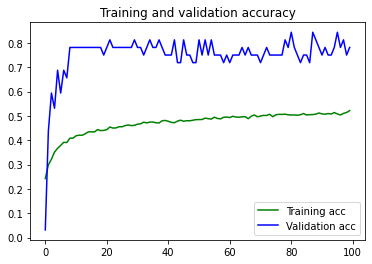

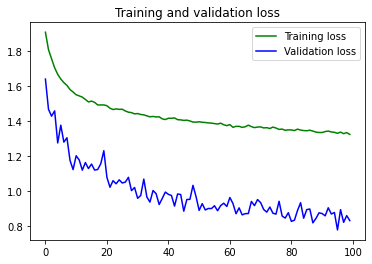

In [17]:
acc = vgg_2_hist.history['accuracy']
val_acc = vgg_2_hist.history['val_accuracy']
loss = vgg_2_hist.history['loss']
val_loss = vgg_2_hist.history['val_loss']
epochs = range(len(acc))


plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
test_generator_vgg2 = test_datagen.flow_from_directory(test_dir, 
                                                              target_size=(224, 224), 
                                                              batch_size=32, 
                                                              class_mode='categorical',
                                                              shuffle=False)

Found 3147 images belonging to 7 classes.


In [20]:
y_pred = model_final2.predict(test_generator_vgg2, batch_size=32)

In [21]:
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator_vgg2.classes, y_pred))

Confusion Matrix
[[280  11  19  51   5  27  11]
 [ 23 119  57  44   4  30   3]
 [ 40  38 364  54  10  85   8]
 [ 35  43  79 151  11  20  13]
 [ 41  28  18  47  73   8   5]
 [ 78  32  80  36  12 735  17]
 [ 60  23  56  46   9  66  42]]


In [22]:
print(classification_report(test_generator_vgg2.classes, y_pred, target_names = [key for key,value in test_generator_vgg2.class_indices.items()]))

                precision    recall  f1-score   support

    earthquake       0.50      0.69      0.58       404
          fire       0.40      0.42      0.41       280
         flood       0.54      0.61      0.57       599
     hurricane       0.35      0.43      0.39       352
     landslide       0.59      0.33      0.42       220
  not_disaster       0.76      0.74      0.75       990
other_disaster       0.42      0.14      0.21       302

      accuracy                           0.56      3147
     macro avg       0.51      0.48      0.48      3147
  weighted avg       0.56      0.56      0.55      3147

